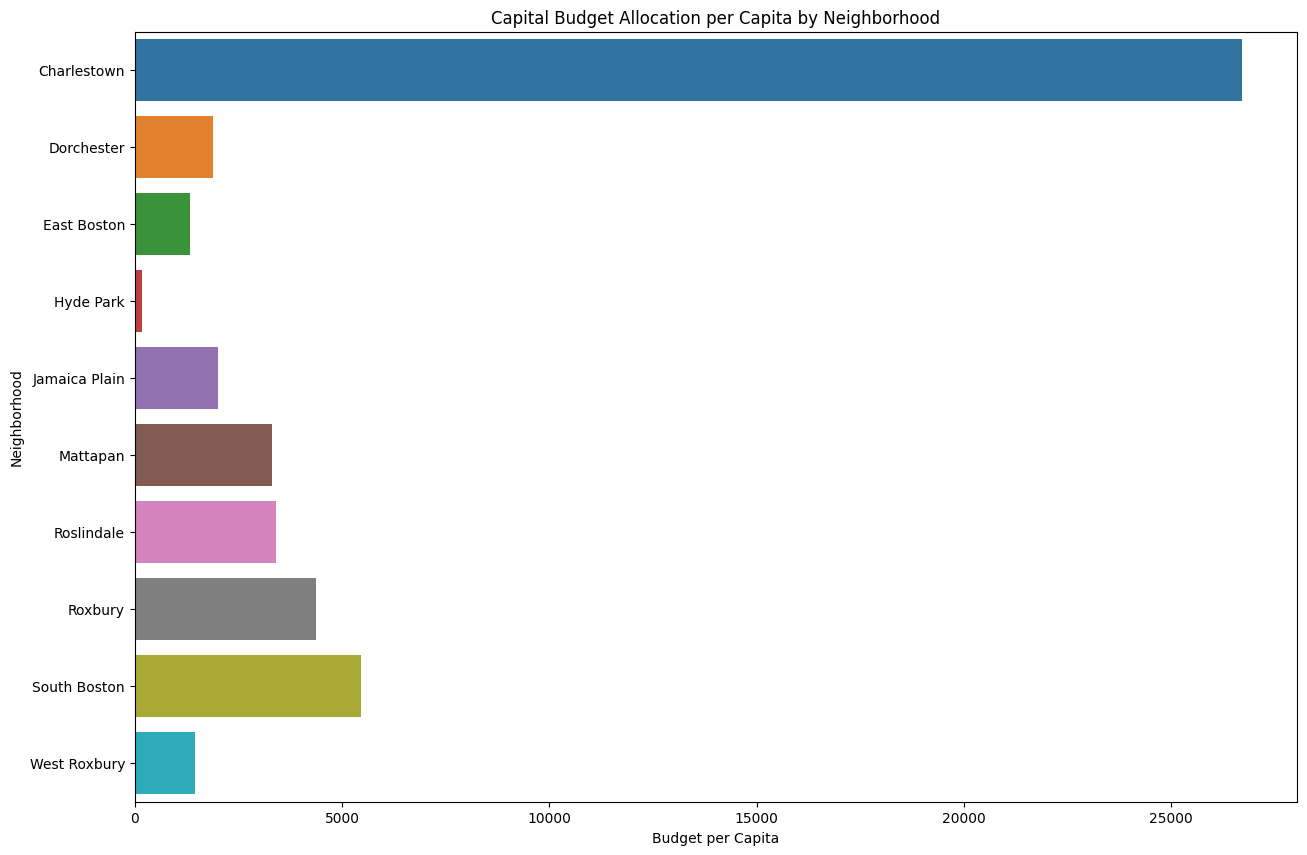

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

population_df = pd.read_csv('2015-2019_neighborhood_tables_2021.12.21.csv')
df = pd.read_csv('fy24-capital-budget-plan-recommended.csv')

df['Total_Project_Budget'] = df['Total_Project_Budget'].str.replace(',', '')
df['Total_Project_Budget'] = df['Total_Project_Budget'].astype(float)

# Remove "Multiple Neighborhoods" and "Citywide" from the data
df = df[df['Neighborhood'] != 'Multiple Neighborhoods']
df = df[df['Neighborhood'] != 'Citywide']

budget_by_neighborhood = df.groupby('Neighborhood').sum()

# Merge the aggregated budget data with population data
merged_df = population_df.merge(budget_by_neighborhood, left_on='Area', right_on='Neighborhood', how='inner')

# Normalize the budget by total population for comparison
merged_df['Budget_per_Capita'] = merged_df['Total_Project_Budget'] / merged_df['Total Population']

plt.figure(figsize=(15, 10))
sns.barplot(x='Budget_per_Capita', y='Area', data=merged_df)
plt.title('Capital Budget Allocation per Capita by Neighborhood')
plt.xlabel('Budget per Capita')
plt.ylabel('Neighborhood')
plt.show()

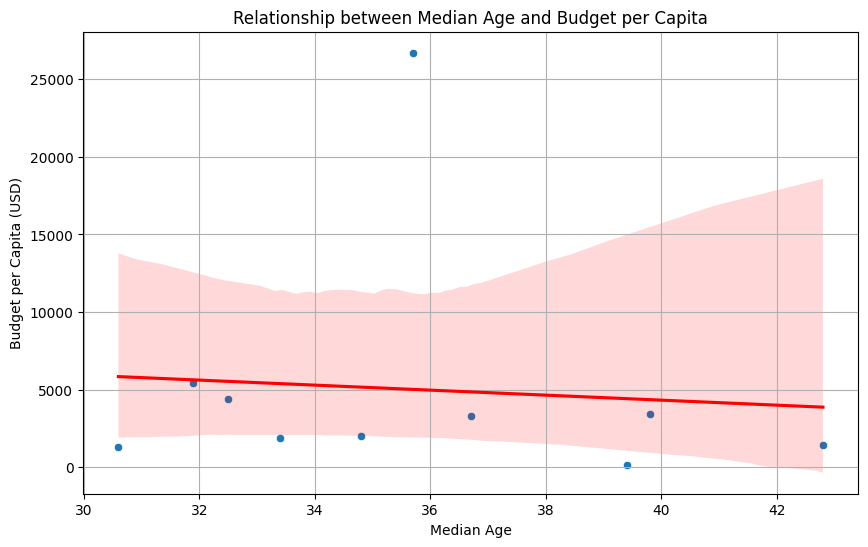

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Median Age', y='Budget_per_Capita', data=merged_df)
sns.regplot(x='Median Age', y='Budget_per_Capita', data=merged_df, scatter=False, color='red')

plt.title('Relationship between Median Age and Budget per Capita')
plt.xlabel('Median Age')
plt.ylabel('Budget per Capita (USD)')
plt.grid(True)
plt.show()